# Practical 1 : EDA on <i><b>cardekho_dataset.csv</b></i>

> ### load the database

In [29]:
import pandas as pd 
df = pd.read_csv("cardekho_dataset.csv")
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [30]:
df.columns

Index(['Unnamed: 0', 'car_name', 'brand', 'model', 'vehicle_age', 'km_driven',
       'seller_type', 'fuel_type', 'transmission_type', 'mileage', 'engine',
       'max_power', 'seats', 'selling_price'],
      dtype='object')

In [31]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


Unnamed: 0           0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [32]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For Regression (Predictive Analysis)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


> ### Part 1: Descriptive Analysis

### Q1: What is the average selling price of cars in this dataset?

In [33]:
avg_price = df["selling_price"].mean()
print("avg selling price : ",avg_price)

avg selling price :  774971.1164103562


### Q2: Which fuel type is most common?

In [34]:
fuel_count = df["fuel_type"].value_counts()
print(fuel_count)

fuel_type
Petrol      7643
Diesel      7419
CNG          301
LPG           44
Electric       4
Name: count, dtype: int64


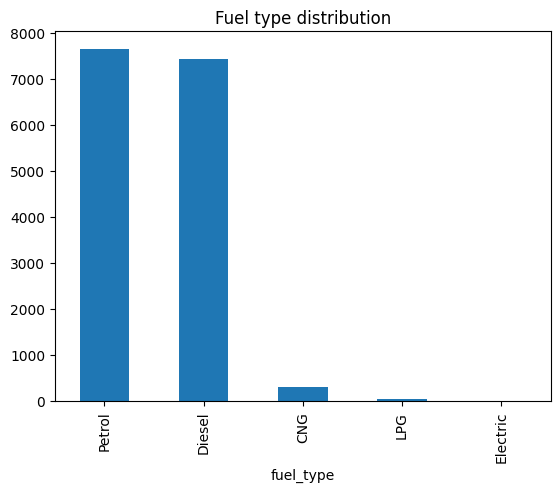

In [35]:
fuel_count.plot(kind='bar')
plt.title("Fuel type distribution")
plt.show()

### Q3: How many cars have manual vs automatic transmission?

In [36]:
transmission_counts = df["transmission_type"].value_counts()
print(transmission_counts)

transmission_type
Manual       12225
Automatic     3186
Name: count, dtype: int64


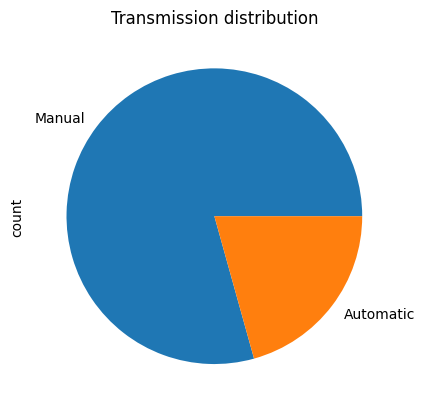

In [37]:
transmission_counts.plot(kind='pie')
plt.title("Transmission distribution")
plt.show()


> ### Part 2: Relationship Analysis

### Q4: Does vehicle age affect selling price?

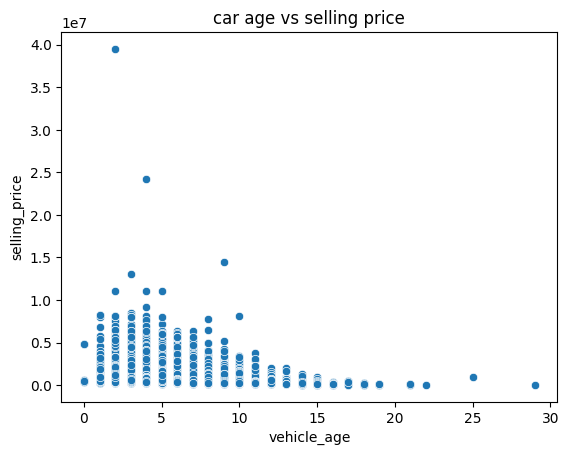

In [38]:
sns.scatterplot(x = 'vehicle_age', y = 'selling_price',data=df)
plt.title("car age vs selling price")
plt.show()

In [39]:
correlation_age = df['vehicle_age'].corr(df['selling_price'])
print("correlation between car age and selling price: ",correlation_age)

correlation between car age and selling price:  -0.2418514586696861


### Q5: Which brand has the highest average selling price?

brand
Ferrari        3.950000e+07
Rolls-Royce    2.420000e+07
Bentley        9.266667e+06
Maserati       6.100000e+06
Porsche        5.161190e+06
Name: selling_price, dtype: float64


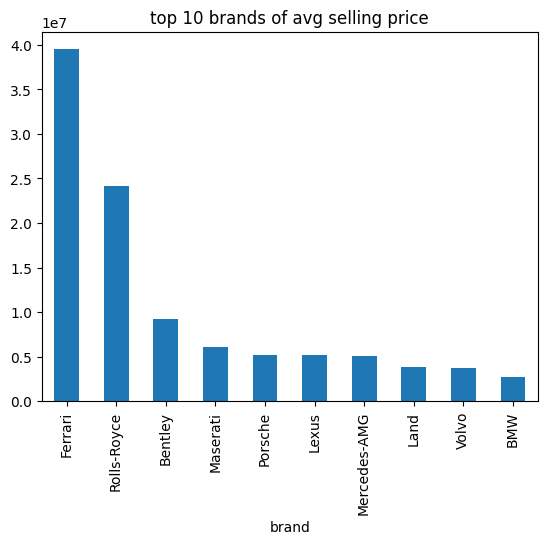

In [40]:
df['brand'] = df['car_name'].str.split().str[0]
brand_avg_price = df.groupby('brand')['selling_price'].mean().sort_values(ascending=False)

print(brand_avg_price.head())
brand_avg_price.head(10).plot(kind='bar')
plt.title("top 10 brands of avg selling price")
plt.show()

> ### Part 3: Predictive Analysis

### Q6: Can we predict selling price based on mileage, engine size, and max power?

In [ ]:
df['mileage'] = df['mileage'].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)
df['engine'] = df['engine'].astype(str).str.extract(r'(\d+)')[0].astype(float)
df['max_power'] = df['max_power'].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)

# computing correlation
correlation_matrix = df[['selling_price','mileage','engine','max_power']].corr()

print(correlation_matrix)

               selling_price   mileage    engine  max_power
selling_price       1.000000 -0.305549  0.585844   0.750236
mileage            -0.305549  1.000000 -0.632987  -0.533128
engine              0.585844 -0.632987  1.000000   0.807368
max_power           0.750236 -0.533128  0.807368   1.000000


> ### Part 4: Deeper Analysis

### Q7: Which seller type offers the cheapest cars on average?


seller_type
Dealer              872505.503722
Individual          617880.483418
Trustmark Dealer    571959.537572
Name: selling_price, dtype: float64


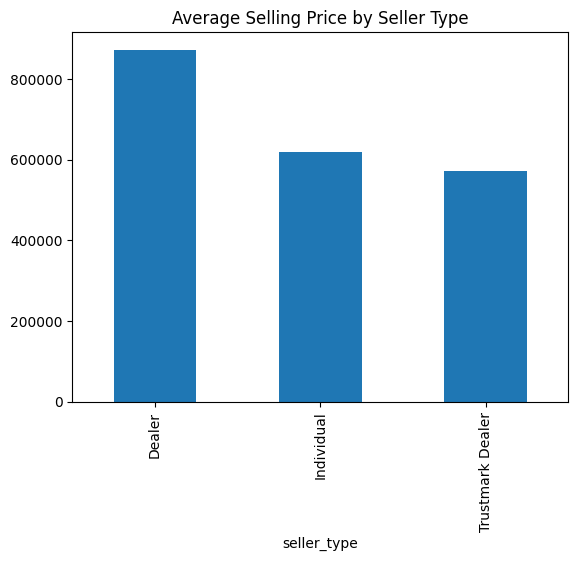

In [42]:
seller_avg = df.groupby('seller_type')['selling_price'].mean()
print(seller_avg)

seller_avg.plot(kind='bar')
plt.title("Average Selling Price by Seller Type")
plt.show()

### Q8: What is the distribution of car seats?


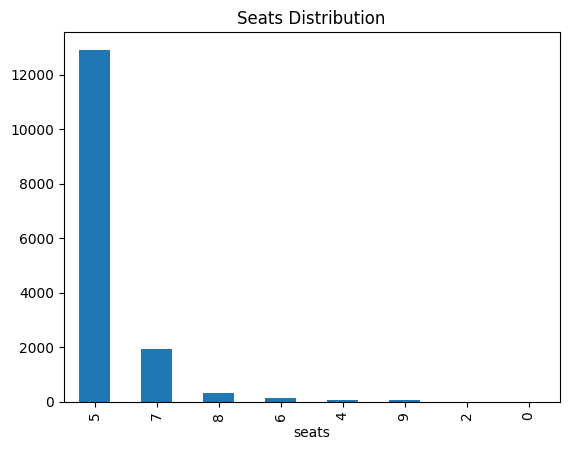

In [43]:
df['seats'].value_counts().plot(kind='bar')
plt.title("Seats Distribution")
plt.show()

### Q9: Is there a correlation between engine size and mileage?


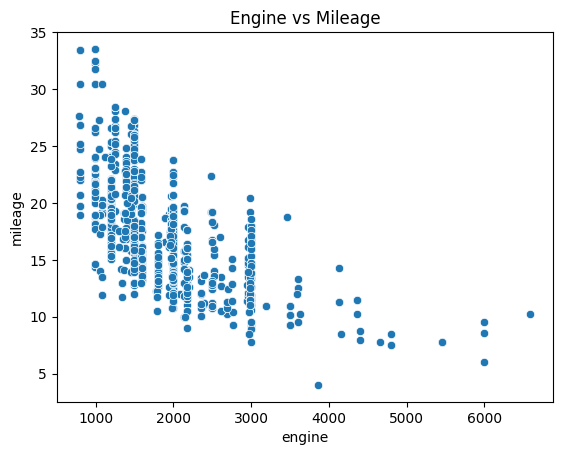

Correlation: -0.632987074009182


In [44]:
sns.scatterplot(x='engine', y='mileage', data=df)
plt.title("Engine vs Mileage")
plt.show()

print("Correlation:", df['engine'].corr(df['mileage']))

### Q10: What’s the average selling price by fuel type?


fuel_type
CNG         4.176877e+05
Diesel      1.000469e+06
Electric    1.853500e+06
LPG         2.062727e+05
Petrol      5.728619e+05
Name: selling_price, dtype: float64


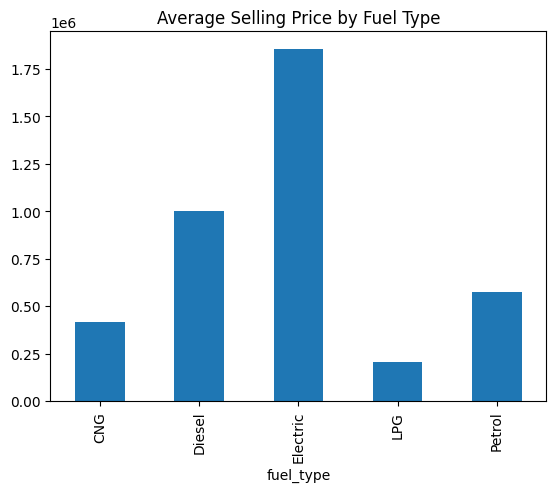

In [48]:
fuel_avg = df.groupby('fuel_type')['selling_price'].mean()
print(fuel_avg)

fuel_avg.plot(kind='bar')
plt.title("Average Selling Price by Fuel Type")
plt.show()

### Q11: How does transmission type affect mileage?

transmission_type
Automatic    17.391008
Manual       20.303206
Name: mileage, dtype: float64


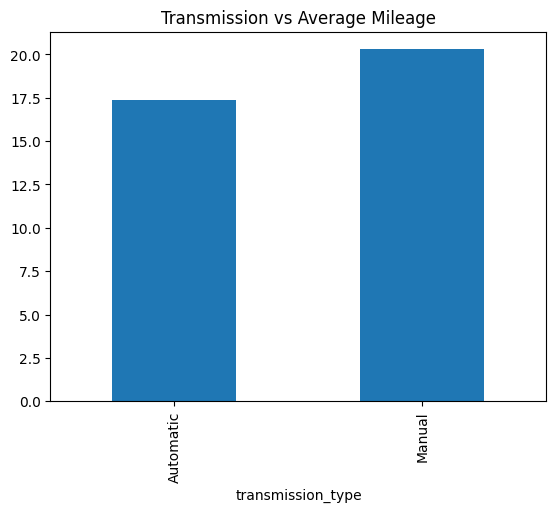

In [50]:
transmission_mileage = df.groupby('transmission_type')['mileage'].mean()
print(transmission_mileage)

transmission_mileage.plot(kind='bar')
plt.title("Transmission vs Average Mileage")
plt.show()